## Introduction to Deep Learning 
# Part 4 - Multilayer Perceptron with Keras
### Build and visualize Simple feed forward dense network with Mnist data

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss

%matplotlib inline  

## Lets start Keras
In the Mnist classification example, we saw that the net basically learn templates.<br>
This is not robust enough for generalization. <br>
To generalize, we want the neural network to learn **features**. <br>
For that we will need deeper and more complexed networks.<br>
Lets build our first neural network with Keras.

In [139]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

In [140]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Lets start with simple binary classification example
### Create, normalize and split data

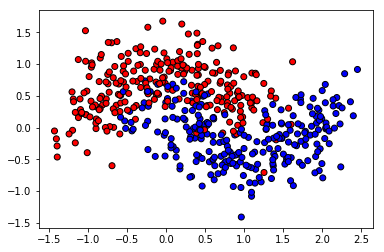

In [218]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_moons(n_samples=500,noise=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')
    

In [219]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
                                                    random_state=42)
X_train.shape

(300, 2)

### Build and compile keras model

In [143]:
batch_size = 20
num_classes = 2
epochs = 10

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_92 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [144]:


history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))



Train on 300 samples, validate on 200 samples
Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6998 - acc: 0.5100 - val_loss: 0.6764 - val_acc: 0.4850
Epoch 2/10
300/300 [==============================] - 0s 106us/step - loss: 0.6307 - acc: 0.5467 - val_loss: 0.6238 - val_acc: 0.5550
Epoch 3/10
300/300 [==============================] - 0s 130us/step - loss: 0.5784 - acc: 0.7267 - val_loss: 0.5765 - val_acc: 0.7450
Epoch 4/10
300/300 [==============================] - 0s 106us/step - loss: 0.5300 - acc: 0.8533 - val_loss: 0.5327 - val_acc: 0.8150
Epoch 5/10
300/300 [==============================] - 0s 116us/step - loss: 0.4854 - acc: 0.8600 - val_loss: 0.4936 - val_acc: 0.8250
Epoch 6/10
300/300 [==============================] - 0s 106us/step - loss: 0.4462 - acc: 0.8633 - val_loss: 0.4602 - val_acc: 0.8400
Epoch 7/10
300/300 [==============================] - 0s 100us/step - loss: 0.4138 - acc: 0.8733 - val_loss: 0.4345 - val_acc: 0.8400
Epoch 8/10
300/300

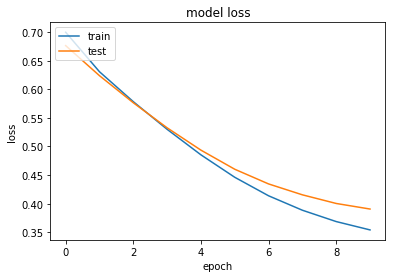

In [145]:
uplot.drow_history(history, 'loss')

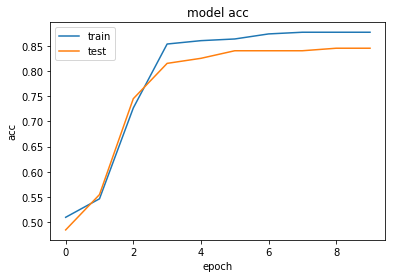

In [146]:
uplot.drow_history(history, 'acc')

## Evaluate model

In [147]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.390633443594
Test accuracy: 0.845


## Predict

In [148]:
pred_test = model.predict(X_test)
pred_test[0:5]

array([[ 0.9071539 ],
       [ 0.86741751],
       [ 0.10413332],
       [ 0.36099964],
       [ 0.76122612]], dtype=float32)

In [149]:
#y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test = np.where(pred_test > 0.5, 1, 0).flatten()
y_pred_test[0:10], y_test[0:10]

(array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64))

In [150]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

def print_stats(ytest, ypred):
    
    print("Accuracy: {:.5f}, Cohen's Kappa Score: {:.5f}".format(
        accuracy_score(ytest, ypred), 
        cohen_kappa_score(ytest, ypred, weights="quadratic")))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

In [151]:
print_stats(y_test,y_pred_test )

Accuracy: 0.84500, Cohen's Kappa Score: 0.68969
Confusion Matrix:
[[88 14]
 [17 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.85      0.83      0.84        98

   micro avg       0.84      0.84      0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



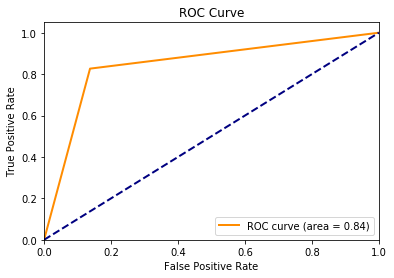

In [152]:
uplot.drow_roc_curve(y_test,y_pred_test)

## Model improovments
### Dropout
The method: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a given fraction, randomly chosen p, of nodes.
Dropout forces a neural network to learn more robust features.


From https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.



## Hyper parameters: batch_size, number of epoch

In [168]:
batch_size = 30
epochs = 20

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(2,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 32)                96        
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [169]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 300 samples, validate on 200 samples
Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6127 - acc: 0.7733 - val_loss: 0.5687 - val_acc: 0.8100
Epoch 2/20
300/300 [==============================] - 0s 80us/step - loss: 0.5471 - acc: 0.8267 - val_loss: 0.5165 - val_acc: 0.8100
Epoch 3/20
300/300 [==============================] - 0s 100us/step - loss: 0.5001 - acc: 0.8367 - val_loss: 0.4778 - val_acc: 0.8150
Epoch 4/20
300/300 [==============================] - 0s 93us/step - loss: 0.4553 - acc: 0.8400 - val_loss: 0.4444 - val_acc: 0.8200
Epoch 5/20
300/300 [==============================] - 0s 113us/step - loss: 0.4251 - acc: 0.8433 - val_loss: 0.4171 - val_acc: 0.8200
Epoch 6/20
300/300 [==============================] - 0s 83us/step - loss: 0.3902 - acc: 0.8467 - val_loss: 0.3998 - val_acc: 0.8200
Epoch 7/20
300/300 [==============================] - 0s 103us/step - loss: 0.3939 - acc: 0.8533 - val_loss: 0.3861 - val_acc: 0.8250
Epoch 8/20
300/300 [=

In [170]:
print_stats(y_test,y_pred_test )

Accuracy: 0.84500, Cohen's Kappa Score: 0.68969
Confusion Matrix:
[[88 14]
 [17 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.85      0.83      0.84        98

   micro avg       0.84      0.84      0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



# exercise
Following are code to create, normalize and split circle data.

1. Create model for classification of circles data. Same as we did in class
2. Try to improve the model.


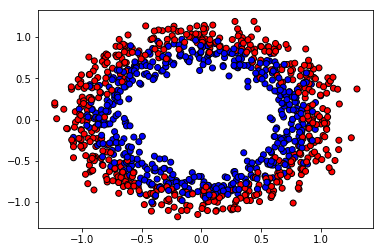

In [123]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_circles(n_samples=1000,noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')
    

In [124]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
                                                    random_state=42)
X_train.shape

(600, 2)

# Multi-class classification

In [222]:
batch_size = 20
num_classes = 2
epochs = 10

y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test2))

score = model.evaluate(X_test, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_161 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_162 (Dense)            (None, 2)                 34        
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 200 samples
Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.6984 - acc: 0.4667 - val_loss: 0.6412 - val_acc: 0.6550
Epoch 2/10
300/300 [==============================] - 0s 123us/step - loss: 0.6145 - acc: 0.6600 - val_loss: 0.5860 - val_acc: 0.7550
Epoch 3/10
300/300 [==============================] - 0s 146us/step - loss: 0.5609 - acc: 0.7500

## Predict

In [223]:
pred_test = model.predict(X_test)
pred_test[0:5]

array([[ 0.0841841 ,  0.91581589],
       [ 0.15923318,  0.84076685],
       [ 0.89275032,  0.10724966],
       [ 0.56337297,  0.436627  ],
       [ 0.18372442,  0.8162756 ]], dtype=float32)

In [224]:
y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test[0:10], y_test[0:10]

(array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64),
 array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64))

In [225]:
pred_test = model.predict_classes(X_test)
pred_test[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [226]:
print_stats(y_test,pred_test )

Accuracy: 0.84000, Cohen's Kappa Score: 0.67974
Confusion Matrix:
[[87 15]
 [17 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       102
           1       0.84      0.83      0.84        98

   micro avg       0.84      0.84      0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



## Mnist example

In [285]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [286]:
# convert class vectors to binary class matrices
# create "dummy" variables for each category
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

### Create the model
In previous chapter,I used the word network,in practical world, it called model.<br>
Model is from keras examples: https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [236]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_167 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_168 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [237]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.2216 - acc: 0.9314 - val_loss: 0.1041 - val_acc: 0.9674
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0816 - acc: 0.9750 - val_loss: 0.0738 - val_acc: 0.9771
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0520 - acc: 0.9837 - val_loss: 0.0762 - val_acc: 0.9779
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0393 - acc: 0.9872 - val_loss: 0.0670 - val_acc: 0.9817
Epoch 5/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0283 - acc: 0.9911 - val_loss: 0.0925 - val_acc: 0.9770
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0230 - acc: 0.9931 - val_loss: 0.0924 - val_acc: 0.9790
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0187 - acc: 0.9939 - val_loss: 0.

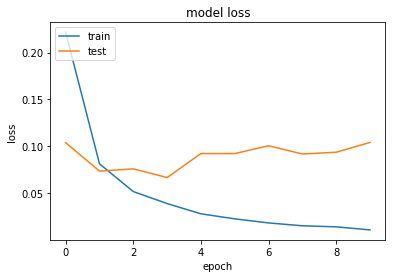

In [238]:
uplot.drow_history(history, 'loss')

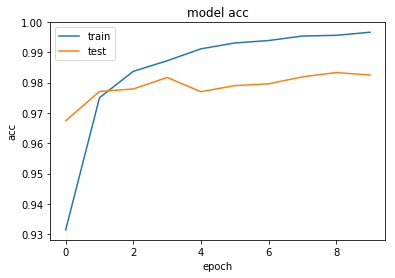

In [239]:
uplot.drow_history(history, 'acc')

We can see that 2 epoch is best suitable for this classification task. After 2 epoch, the net starts to overffit to the data.

In [240]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.104321993805
Test accuracy: 0.9825


## Visualize layers
While training the model, lets view the layers, meaning the incoming weights, to each neuron in the layer. Lets train for 2 epoch's, and examine the results. 

In [241]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 10s 170us/step - loss: 0.0112 - acc: 0.9966 - val_loss: 0.1081 - val_acc: 0.9827
Epoch 2/2
60000/60000 [==============================] - 11s 181us/step - loss: 0.0089 - acc: 0.9974 - val_loss: 0.1179 - val_acc: 0.9823


### First Hidden Layer
First layer is a dense layer of size 512, meaning that each input pixel intensity, from the 764 inputs, is connected to each neuron in the hidden layer.<br>
So we get $784*512$ incoming weights to the first hidden layer. Lets look at them:

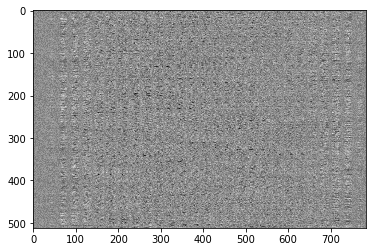

In [242]:
W0 = model.get_layer(name=model.layers[0].name).get_weights()[0]
W0a=W0.reshape((784,512)).copy()
plt.imshow(W0a.T);
plt.set_cmap('gray')

Each row in the above matrix,is multiplication by the input layer pixels intensities,or the input vector, and produce $512$ input vector to the next layer.<br>
To demonstrate the weights, we will reshape each row(of 784 weights) back to the (28,28) original shape, so we can see what patterns are causing activation.

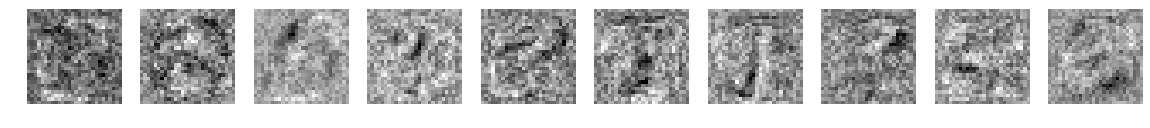

In [243]:
import utils_plot as uplot
dense_list0 = [W0a.T[i, :].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list0)

### Activation Example of the First Hidden Layer
Lets check the network "response" or activation, to one of the digit images from the test set, and follow the weighs and activation flow down to the last output layer.<br>
To do that, we multiply $W^T*X$,where $X$ is an input image. <br>
The image:

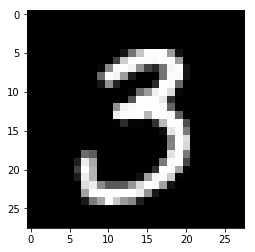

In [244]:
W70=W0a.T*x_test[90]
plt.imshow(x_test[90].reshape(28,28))

Lets view the activation of the image, the result of the multiplication above.

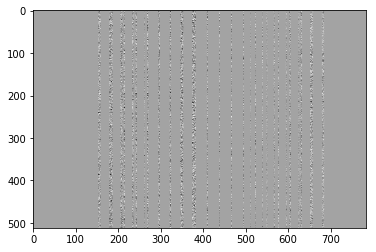

In [245]:
plt.imshow(W70)

Again,to understand the activation patterns,we reshape them back to the(28,28) original shape.

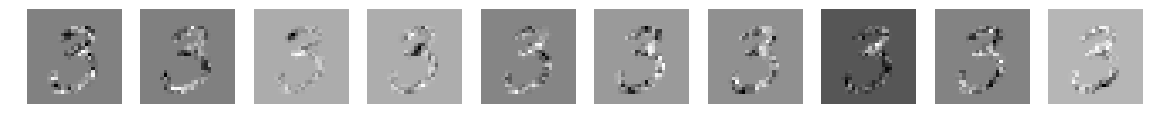

In [246]:
dense_list70 = [W70[i, :].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list70)

### Second hodden layer

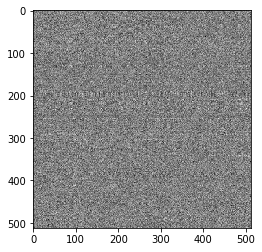

In [247]:
W1 = model.get_layer(name=model.layers[1].name).get_weights()[0]
Wa1=W1.reshape((512,512)).copy()
plt.imshow(Wa1)

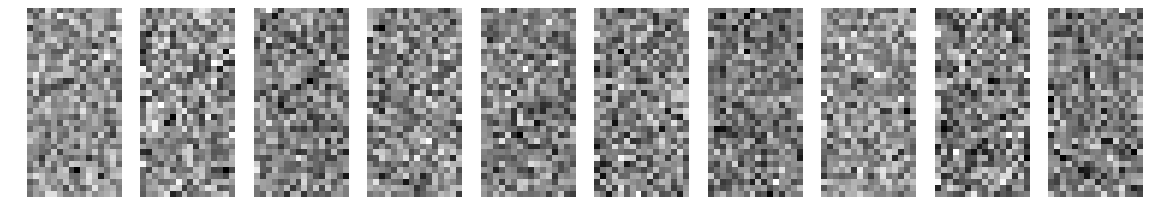

In [248]:
dense_list1= [Wa1[i,:].reshape(32,16) for i in range(10)]
uplot.show_list_images(dense_list1)


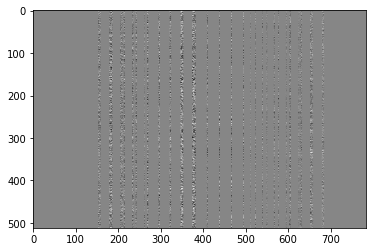

In [249]:
W17 = np.dot((Wa1.T),W70)
plt.imshow(W17)

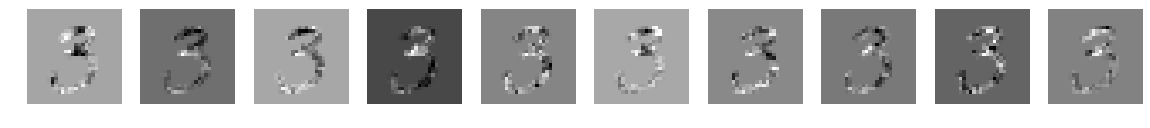

In [252]:
dense_list17= [W17[i,:].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list17)

### Last Dense Layer
Last dense layer size is 10, as the number of classes. Following is a view of this Layer, as a matrix, and with each row resized to a rectangle.

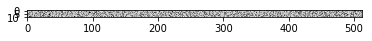

In [253]:
W2 = model.get_layer(name=model.layers[2].name).get_weights()[0]
W2a=W2.reshape((10,512)).copy()
plt.imshow(W2a)

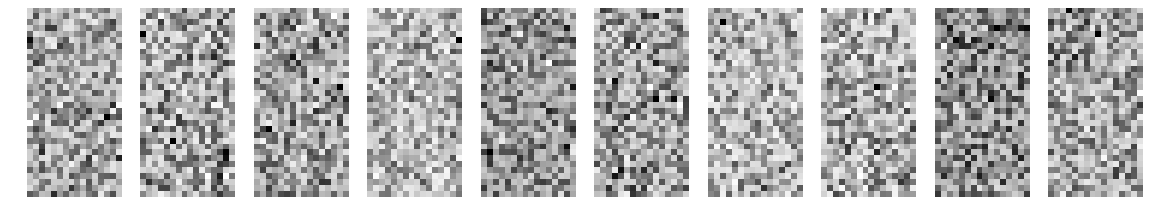

In [254]:

dense_list2= [W2a[i, :].reshape(32,16) for i in range(10)]
uplot.show_list_images(dense_list2)

Hard to see any patterns in this layer visualization. 

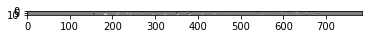

In [255]:
W27=np.dot(W2.T,W17)
plt.imshow(W27)

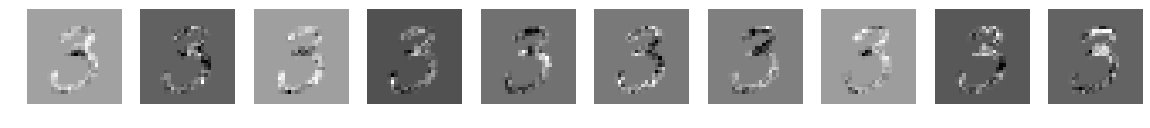

In [256]:
dense_list27= [W27[i, :].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list27)

### Apply Softmax on the last hidden layer.
We can see from the weights image, that the "template" or row for the digit 3, is standing out in the activation row, and that is reflected in the numbers.

In [266]:

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference


In [268]:
print([W27[i].sum() for i in range(10)])
x = [W27[i].sum() for i in range(10)]

pred = softmax(x)#np.exp(x)/np.sum(x)

for i in range(10):
    print("{0:.2f}".format(pred[i]), end=' ')

[123.17984, 30.116413, 66.496086, 233.01317, -16.257748, 12.388466, -48.358948, 37.838829, 189.66144, 145.98822]
0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 

We can see quit clearly the performing templates, it can easily bring to over-fit. To decrease the chances of that, we add a down-sampling,or noising layer, called Dropout. 
## Dropout hidden layer
The method: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a given fraction, randomly chosen p, of nodes.<br>
Dropout forces a neural network to learn more robust features.<br>
Lets compare the results of the previous network, to a network with dropout layers,between the dense layers:

In [269]:
# Create the model, and lay the layers oneontop of the other
# specifing layers parameters.
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [270]:
# Initialize model, and train for 10 epoch
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_170 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_171 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [271]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.2483 - acc: 0.9235 - val_loss: 0.1035 - val_acc: 0.9674
Epoch 2/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.1038 - acc: 0.9681 - val_loss: 0.0837 - val_acc: 0.9732
Epoch 3/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.0765 - acc: 0.9772 - val_loss: 0.0754 - val_acc: 0.9785
Epoch 4/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0610 - acc: 0.9821 - val_loss: 0.0741 - val_acc: 0.9800
Epoch 5/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0490 - acc: 0.9849 - val_loss: 0.0826 - val_acc: 0.9778
Epoch 6/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0438 - acc: 0.9872 - val_loss: 0.0814 - val_acc: 0.9808
Epoch 7/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0392 - acc: 0.9880 - val_loss: 0.

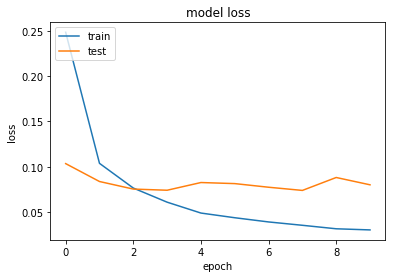

In [272]:
uplot.drow_history(history, 'loss')

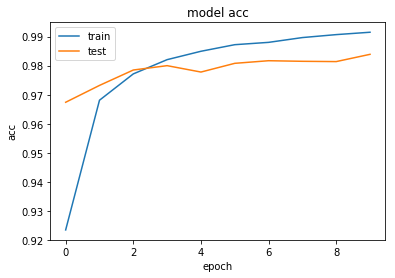

In [273]:
uplot.drow_history(history, 'acc')

We can see that 2 epoch is best suitable for this classification task. After 2 epoch, the net starts to overffit to the data.

In [274]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0801059888657
Test accuracy: 0.9839


## Predict
Following are few predictions of the trained network.

In [275]:
print(type(x_train))

<class 'numpy.ndarray'>


In [278]:
x = x_test[100:120]

predictions = model.predict(x);
print('Predictions:\n')
print(predictions)
print('\nTrue Lables:\n')
print(np.argmax(y_test[100:120],axis=1))


Predictions:

[[  1.61788018e-16   3.81978507e-16   5.14238903e-19   6.48136450e-22
    1.12008355e-15   8.29480731e-14   1.00000000e+00   3.42910142e-18
    1.53737528e-15   7.70923660e-23]
 [  1.00000000e+00   2.71383495e-24   5.42350326e-16   1.07074839e-18
    9.82435279e-19   7.96819114e-17   8.37505482e-11   5.94301830e-11
    2.59785998e-17   4.04544757e-12]
 [  2.19644540e-34   1.83694984e-34   1.64239204e-32   8.73592052e-13
    0.00000000e+00   1.00000000e+00   2.14472945e-27   1.04699305e-28
    5.49397853e-20   1.91880699e-21]
 [  4.77177802e-27   8.49955125e-25   3.58383817e-18   2.46115916e-27
    1.00000000e+00   1.17016340e-21   4.34877929e-21   4.57035445e-18
    7.93942984e-24   4.40201203e-18]
 [  2.38292433e-18   2.15594752e-19   1.78810310e-16   1.16492402e-07
    7.04294175e-12   2.08465681e-05   5.42857646e-19   3.17356003e-11
    8.54293436e-09   9.99979019e-01]
 [  9.80216305e-17   1.14450736e-17   3.42854705e-13   8.69720438e-08
    1.33490978e-08   1.23956312

In [282]:
x = x_test[100:120]

predictions_classes = model.predict_classes(x);
print('Predictions:\n')
print(predictions_classes)
print('\nTrue Lables:\n')
predictions=np.argmax(y_test[100:120],axis=1)
print(predictions)


Predictions:

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]

True Lables:

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]


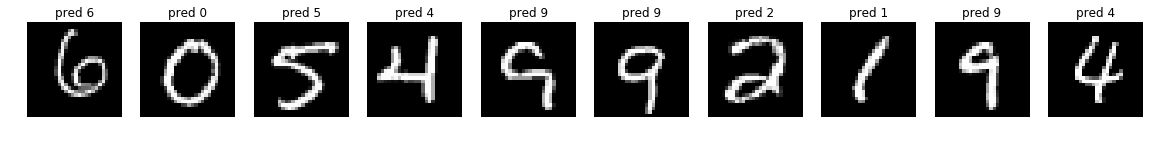

In [283]:

imgs = [x_test[i].reshape(28,28) for i in range(100,110)]
titles = [("pred {}").format(predictions[i]) for i in range(20)]
uplot.show_list_images(imgs, titles)

We can see that the prediction are very accurate, but we can see as well that the network is limited in its ability to understand digits in different locations and orientations. <br>
Lets think about the following idea: We have an image, with a digit inside. if we can "move" our network around, and position it on the part containing the digit, in the right orientation, we can  classify the digit correctly. This is, in a very simplified form, the idea of **convolutional neural  networks**. They work with sets of filters, slided over the image, to capture specific features, without being bind to specific location.

### Learn more:
* https://keras.io/
* https://www.coursera.org/learn/neural-networks/lecture/kOQiH/why-object-recognition-is-difficult-5-min

### Articles:
* Zhe Li1, Boqing Gong, Tianbao Yang. **Improved Dropout for Shallow and Deep Learning**, 
The University of Iowa, Iowa city, IA 52245. University of Central Florida, Orlando, FL 32816. https://arxiv.org/pdf/1602.02220.pdf
* Nitish Srivastava,Geoffrey Hinton, Alex Krizhevsky, Ruslan Salakhutdinov, Ilya Sutskever. **Dropout: A Simple Way to Prevent Neural Networks from Overfitting**,  June 2014Journal of Machine Learning Research 15(1):1929-1958
* Ilya Sutskever, James Martens, George Dahl, Geoffrey Hinton. **On the importance of initialization and momentum in deep learning**.  ICML'13 Proceedings of the 30th International Conference on International Conference on Machine Learning - Volume 28 Pages III-1139-III-1147. Atlanta, GA, USA — June 16 - 21, 2013 http://proceedings.mlr.press/v28/sutskever13.pdf

